In [2]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from torch_geometric.datasets import KarateClub

In [4]:
# Import dataset from PyTorch Geometric
dataset = KarateClub()
# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [5]:
# Print first element, since there is a unique graph
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [6]:
data = dataset[0]

Node information

In [7]:
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


edge index

In [8]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [9]:
from torch_geometric.utils import to_dense_adj

In [10]:
A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


Labels

In [12]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


Train mask

In [13]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [14]:
type(data.train_mask)

torch.Tensor

Graph properties

In [15]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


Converting graph to network x

In [16]:
from torch_geometric.utils import to_networkx

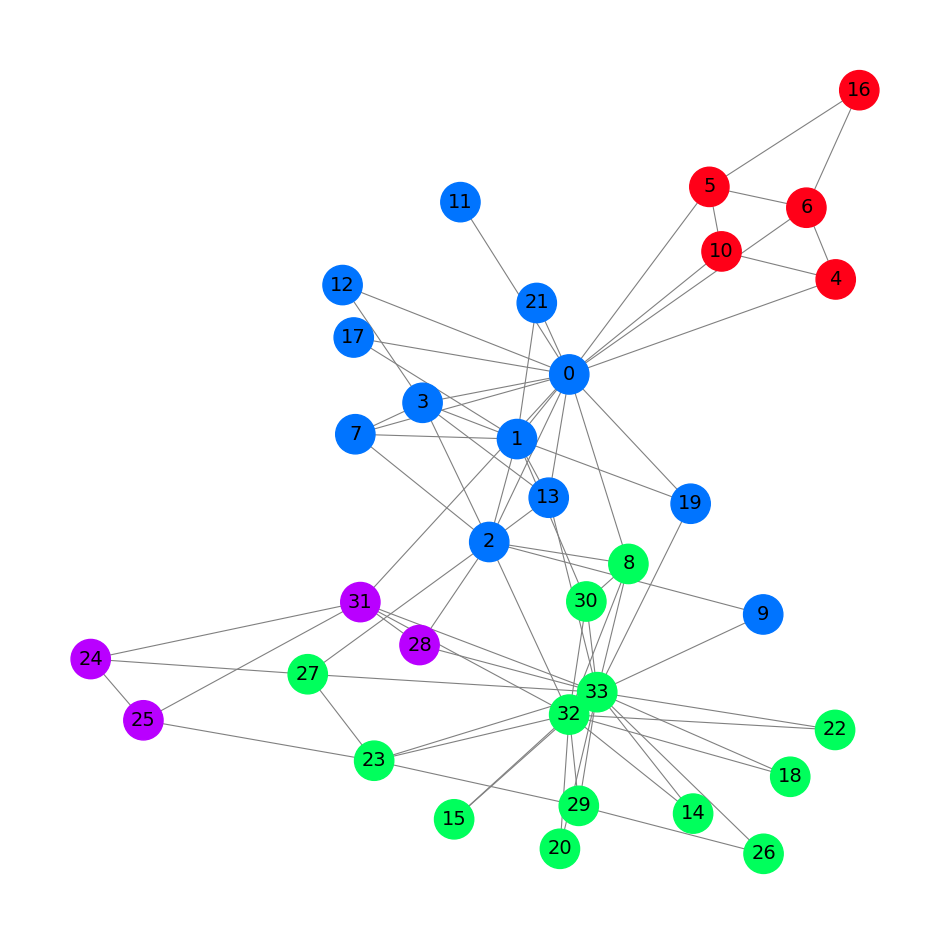

In [22]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

GCN

In [32]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [33]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [34]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

In [35]:
# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)
# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []
# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()
    # Forward pass
    h, z = model(data.x, data.edge_index)
    # Calculate loss function
    loss = criterion(z, data.y)
    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)
    # Compute gradients
    loss.backward()
    # Tune parameters
    optimizer.step()
    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.48 | Acc: 11.76%
Epoch  10 | Loss: 1.34 | Acc: 38.24%
Epoch  20 | Loss: 1.22 | Acc: 52.94%
Epoch  30 | Loss: 1.09 | Acc: 52.94%
Epoch  40 | Loss: 0.92 | Acc: 52.94%
Epoch  50 | Loss: 0.76 | Acc: 76.47%
Epoch  60 | Loss: 0.62 | Acc: 85.29%
Epoch  70 | Loss: 0.51 | Acc: 88.24%
Epoch  80 | Loss: 0.41 | Acc: 88.24%
Epoch  90 | Loss: 0.31 | Acc: 94.12%
Epoch 100 | Loss: 0.22 | Acc: 100.00%
Epoch 110 | Loss: 0.16 | Acc: 100.00%
Epoch 120 | Loss: 0.12 | Acc: 100.00%
Epoch 130 | Loss: 0.09 | Acc: 100.00%
Epoch 140 | Loss: 0.08 | Acc: 100.00%
Epoch 150 | Loss: 0.06 | Acc: 100.00%
Epoch 160 | Loss: 0.05 | Acc: 100.00%
Epoch 170 | Loss: 0.05 | Acc: 100.00%
Epoch 180 | Loss: 0.04 | Acc: 100.00%
Epoch 190 | Loss: 0.04 | Acc: 100.00%
Epoch 200 | Loss: 0.03 | Acc: 100.00%


In [36]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

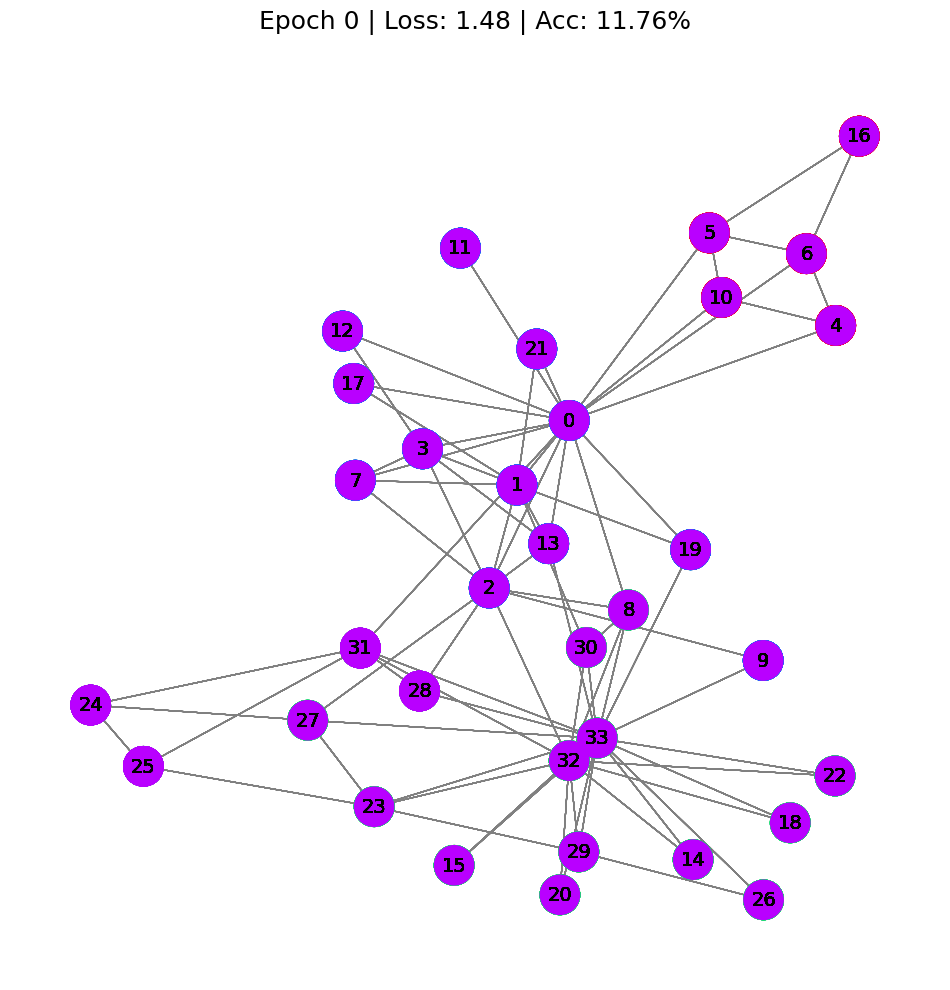

In [39]:
def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)

In [38]:
# Print embeddings
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[0.0000e+00, 0.0000e+00, 1.9539e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.1155e-01],
        [0.0000e+00, 0.0000e+00, 1.4768e-01],
        [0.0000e+00, 0.0000e+00, 3.1131e+00],
        [0.0000e+00, 0.0000e+00, 3.3933e+00],
        [0.0000e+00, 0.0000e+00, 3.3072e+00],
        [0.0000e+00, 0.0000e+00, 4.3940e-01],
        [0.0000e+00, 1.7303e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.0088e-01],
        [0.0000e+00, 0.0000e+00, 3.1177e+00],
        [0.0000e+00, 0.0000e+00, 3.3655e-01],
        [0.0000e+00, 0.0000e+00, 4.0476e-01],
        [0.0000e+00, 0.0000e+00, 3.9821e-01],
        [0.0000e+00, 2.2468e+00, 2.1327e-04],
        [0.0000e+00, 2.2007e+00, 1.0216e-04],
        [0.0000e+00, 0.0000e+00, 3.2139e+00],
        [0.0000e+00, 0.0000e+00, 3.2444e-01],
        [0.0000e+00, 2.1394e+00, 6.8069e-05],
        [0.0000e+00, 0.0000e+00, 3.3556e-01],
        [0.0000e+00, 2.0594e+00, 0.0000e+